# **Übung 6** Programmierung mit Python mit Anwendungen aus dem Maschinellen Lernen



## Aufgabe 1
Die erste Aufgabe beschäftigt sich mit grundlegenden Funktionen des Python Packages `numpy`.

**Aufgabe 1.1 (numpy)** | Erzeugen Sie ein eindimensionales Array mit aufsteigenden Werten `1` bis `25`. Geben Sie das Array aus.
```
Erwartete Ausgabe:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
```


In [ ]:
import numpy as np
arr_range = np.arange(1,26)
print(arr_range)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


**Aufgabe 1.2 (numpy)** | Verändern Sie nun die Array Größe aus Aufgabe 1.1, sodass Sie ein 5x5 Array erhalten. Geben Sie das Array aus.
```
Erwartete Ausgabe:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
```

In [ ]:
arr_5x5 = arr_range.reshape((5,5))
print(arr_5x5)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


**Aufgabe 1.3 (numpy)** | Geben Sie nun jede zweite Zeile und jede zweite Spalte des Arrays aus Aufgabe 1.2, beginnend ab Zeilenindex 2 und Spaltenindex 0, aus. (Indizes beginnen bei 0)

```
Erwartete Ausgabe:
[[11 13 15]
 [21 23 25]]
```

In [ ]:
print(arr_5x5[2::2, 0::2])

[[11 13 15]
 [21 23 25]]


**Aufgabe 1.4 (numpy)** | Geben Sie einen 2x2 Ausschnitt der unteren rechten Ecke aus.
```
Erwartete Ausgabe:
[[19 20]
 [24 25]]
```

In [ ]:
print(arr_5x5[-2:, -2:])

[[19 20]
 [24 25]]


**Aufgabe 1.5 (numpy)** | Prüfen Sie das Array `arr_ones`, dass die folgenden beiden Zeilen erzeugen. Addieren Sie nun zu jeder Zahl im Array `arr_ones` den Zeilenindex in dem diese Zahl steht.

```
Beispiel:
[[1. 1. 1.]    [[1. 1. 1.]
 [1. 1. 1.]  →  [2. 2. 2.]
 [1. 1. 1.]]    [3. 3. 3.]]
```



In [ ]:
ran_2d = np.random.randint(3, 10, size=2)
arr_ones = np.ones(shape=ran_2d)
print(arr_ones)
# print(np.arange(0, arr_ones.shape[0]).reshape(-1,1))

arr_row_idx = arr_ones + np.arange(0, arr_ones.shape[0]).reshape(-1,1)
print(arr_row_idx)


[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7.]]


## Aufgabe 2
Die zweite Aufgabe beschäftigt sich mit einem einfachen Multilayer Perceptron (MLP) und soll grundlegende Operationen in einem neuronalen Netz veranschaulichen.

**Aufgabe 2.1 (MLP)** Gegeben ist ein bekanntes Klassifikationsproblem, der MNIST Fashion Datensatz. Der Datensatz besteht aus 28x28px großen Graustufenbildern, die je einer von 10 Kategorien angehören:
```
T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot
```
Diese Kategorien sollen folgend mit einem MLP klassifiziert werden. Der folgende Code zum Laden des Datensets und dem Anzeigen einiger Beispiele ist vorgegeben. Führen Sie diesen aus und schauen Sie sich die Daten und Ausgabe an.

In [ ]:
# Daten und Ladefunktionen

import gzip
import numpy as np
import matplotlib.pyplot as plt


def load_mnist_fashion(base_path='./'):
    """
    Imports the Fashion-MNIST dataset.
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST. The class labels are:
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
        **x_train, x_test**: uint8 arrays of grayscale image data with shape
          (num_samples, 28, 28).
        **y_train, y_test**: uint8 arrays of labels (integers in range 0-9)
          with shape (num_samples,).
    License:
        The copyright for Fashion-MNIST is held by Zalando SE.
        Fashion-MNIST is licensed under the [MIT license](
        https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).
    """

    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]

    if not base_path.endswith('/'):
        raise AssertionError(
            f'Argument "base_path" has to end with a "/". Passes value is "{base_path}"')

    paths = []
    for fname in files:
        paths.append(base_path + fname)

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    label_dict = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot",
    }

    return (x_train, y_train), (x_test, y_test), label_dict


def load_pretrained_mlp_data(base_path='./'):
    '''
    Loads a model data of a pretrained MLP with one hidden layer.
    Input Size: 784
    Hidden Size: 100
    Output Size: 10
    '''
    if not base_path.endswith('/'):
        raise AssertionError(
            f'Argument "base_path" has to end with a "/". Passes value is "{base_path}"')

    with open(f'{base_path}wb_784_100-wb_100_10.npy', 'rb') as f:
        w1 = np.load(f)
        b1 = np.load(f)
        w2 = np.load(f)
        b2 = np.load(f)

    return (w1, b1), (w2, b2)

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)

Graustufenbild: (28, 28)
Ausschnitt aus den Daten:
[[  0   0   0 193 228 218]
 [  3   0  12 219 220 212]
 [  6   0  99 244 222 220]
 [  0   0  55 236 228 230]
 [  0   0 237 226 217 223]
 [145 204 228 207 213 221]]

Label als Integer: 9



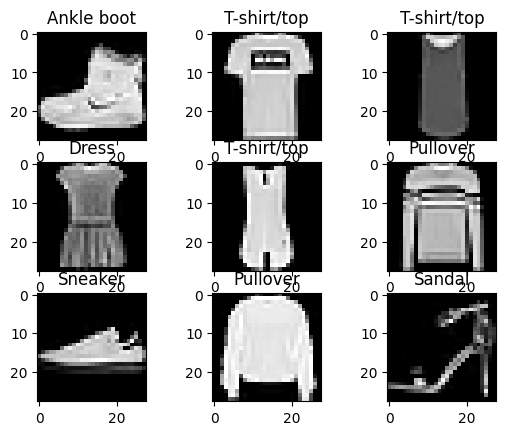

In [ ]:
(x_train, y_train), (x_test, y_test), label_dict = load_mnist_fashion()

# Dimension der Daten
print(f'Train: x={x_train.shape}, y={y_train.shape}')
print(f'Test: x={x_test.shape}, y={y_test.shape}', end='\n\n')

# Übersicht einzelner Datensatz
print(f'Graustufenbild: {x_train[0].shape}')
print(f'Ausschnitt aus den Daten:\n{x_train[0][10:16, 10:16]}', end='\n\n')
print(f'Label als Integer: {y_train[0]}', end='\n\n')

# Visualisieren der Daten
for i in range(9):
    # Sub-Plot IDs
    plt.subplot(330 + 1 + i)
    plt.gca().set_title(label_dict[y_train[i]])  # Bild mit Label versehen
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))  # Bild darstellen
plt.show()

**Aufgabe 2.2 (MLP)** | Als Vorlage zum Implementieren der nötigen Funktionen dient folgende Grafik. Schauen Sie sich die Grafik an. Achten Sie bei der Implementierung auch auf die Dimension der Daten.

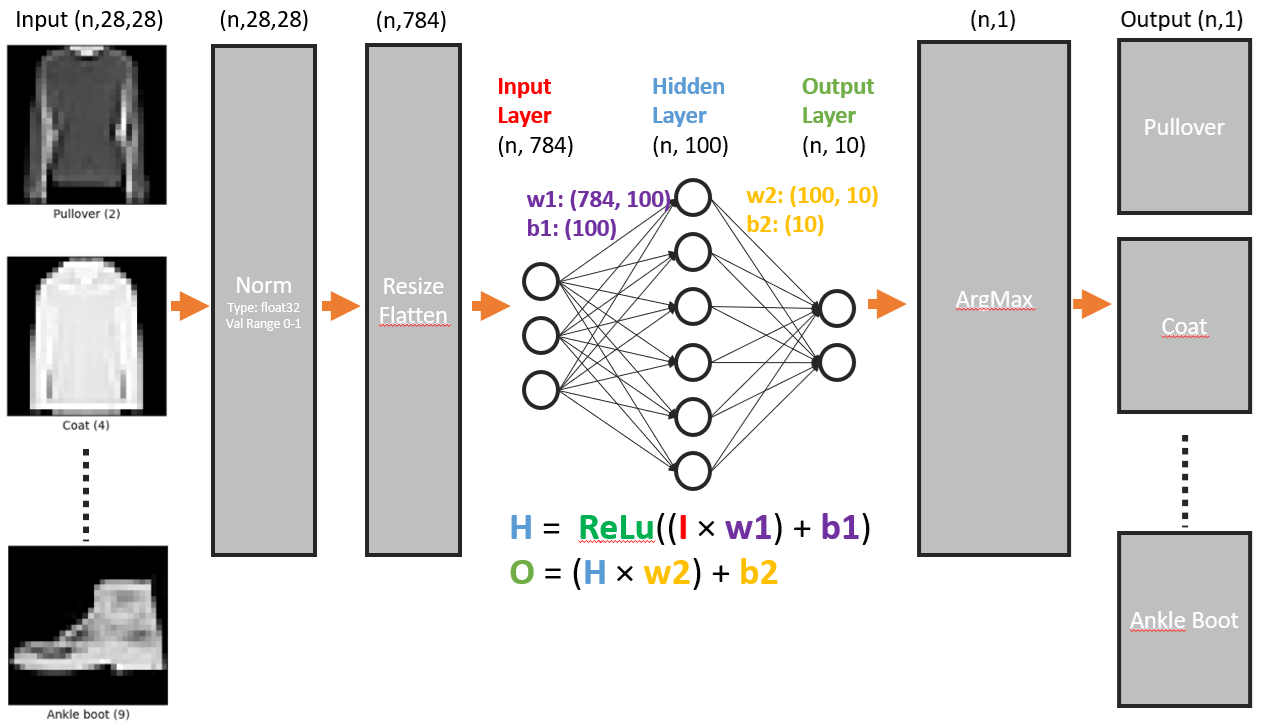

**Aufgabe 2.3 (MLP)** | Schreiben Sie die Funktion `normalize_data` diese normalisiert die Inputdaten (`uint8`: Werte von 0 bis 255) auf `np.float32`-Werte zwischen 0 und 1

In [ ]:
def normalize_data(x):
    return x.astype(np.float32) / 255.

**Aufgabe 2.4 (MLP)** | Schreiben Sie die Funktion `resize`, diese flatted eine Sequenz von Inputdaten (Hier von shape: `28x28` (2D) in shape: `784` (1D))

In [ ]:
def resize(x):
    return x.reshape((-1,784))

**Aufgabe 2.5 (MLP)** | Schreiben Sie die Funktion `relu`:

\begin{align}
        \text{relu}(x) = \left\{
        \begin{array}{cl}
        0 & x \le 0 \\
        x & x > 0
        \end{array}
        \right. 
    \end{align}

In [ ]:
def relu(x):
    return x *(x>0)

**Aufgabe 2.6 (MLP)** | Ein Training wurde im Vorfeld bereits durchgeführt. Das gelernte Modell erreicht eine Genauigkeit von `>85%`. Diese gelernten Gewichte und Biases sind durch die Funktion `load_pretrained_mlp_data` gegeben.

Setzen Sie nun ihre einzelnen Funktionen zusammen und berechnen Sie den 'Forward'-Pfad:
- Normalisieren
- Resize'n / Flatten
- Hidden Layer berechnen
- Output Layer berechnen
- Index des Maximums bestimmen
- Label mit Vorgabe prüfen

In [ ]:
# Laden der vortrainierten Gewichte und Biases
(w1, b1), (w2, b2) = load_pretrained_mlp_data()

In [ ]:
# Laden der vortrainierten Gewichte und Biases
(w1, b1), (w2, b2) = load_pretrained_mlp_data()

norm_data = normalize_data(x_test[0:10])
res_data = resize(norm_data)

hidden_layer = res_data @ w1.T + b1
output_layer = relu(hidden_layer) @ w2.T + b2

classification_result = output_layer.argmax(axis=1)

print([label_dict[l] for l in classification_result])
print([label_dict[l] for l in y_test[0:10]])

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [ ]:
import numpy as np
a = np.arange(1,7)
print(a)
e = a[:, np.newaxis]
print(e)
d = a[np.newaxis, : ]
print(d)
f = a.reshape((3,2))
print(f)
g = f.min(axis=1)
print(g)

[1 2 3 4 5 6]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2 3 4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[1 3 5]
